# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def plot(clf, X, y, f0=0, f1=1, show_vectors=False):

    plt.figure(figsize=(8,6.4))
    cmap = plt.cm.coolwarm
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]

    P = clf.decision_function(temp).reshape(yy.shape)

    plt.pcolormesh(xx, yy, P, cmap=cmap)
    plt.contour(xx, yy, P, colors='k',
       levels=[-1, 0, 1], alpha=0.5,
       linestyles=['--', '-', '--'])
    plt.scatter(X[:, f0], X[:, f1], c=y, cmap=cmap,edgecolor='k')
    if(show_vectors):
        support_vectors = clf.support_vectors_
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k') 

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Hyperparameters

Let us have a look at the effect of different hyperparameters of the SVM, and how they impact classification performance. Ultimately the optimal values of these hyperparameters have to be tuned as per the needs of the problem.

### Effect of C

Let us start by looking at the soft margin parameter C, using the following data.

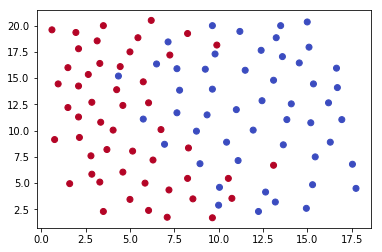

In [3]:
data = pd.read_csv('data/data1.csv', sep=", ", header=None)
X = data.values[:,:-1]
y = data.values[:,-1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

Fit an SVM to the training data, with a linear kernel and C = 0.01. Obtain the predictions for the test data as well.

In [6]:
model1 = SVC(kernel='linear', C=0.01).fit(X_train, y_train)
y_pred = model1.predict(X_test)


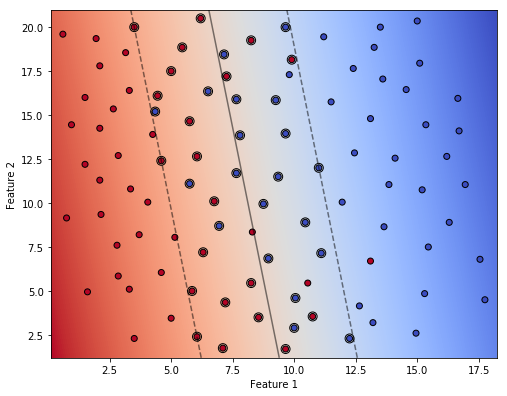

Accuracy: 0.9


In [7]:
plot(model1, X, y, show_vectors=True)
acc_C1 = metrics.accuracy_score(y_pred,y_test)
print('Accuracy: ' + str(acc_C1))

Repeat the same with C = 100 instead.

In [8]:
model2 = SVC(kernel='linear', C=100).fit(X_train, y_train)
y_pred = model2.predict(X_test)


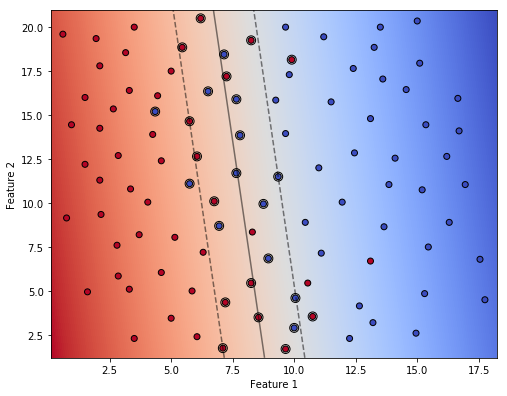

Accuracy: 0.85


In [9]:
plot(model2, X, y, show_vectors=True)
acc_C2 = metrics.accuracy_score(y_pred,y_test)
print('Accuracy: ' + str(acc_C2))

With a smaller value of C, the margin is increased and the orientation of the seperating hyperplane is adjusted to fit the points further away from the boundary. The error penalty assigned to misclassified points is lower due to the larger margin. With a larger value of C, the margin is smaller and the classifier fits the points closer to the boundary, and the error penalty assigned to misclassified points is higher.

In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Polynomial Kernels

We previously worked with the linear kernel, which can also be seen as a polynomial kernel of degree 1. The degree of the polynomial kernel is another hyperparameter to be tuned.

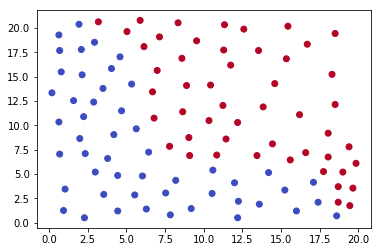

In [11]:
data = pd.read_csv('data/data2.csv', sep=", ", header=None)
X = data.values[:,:-1]
y = data.values[:,-1].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

Use a polynomial kernel of degree 2 and classify the data. Let the value of C be 0.1.

In [12]:
model = SVC(kernel = 'poly', degree=2, C=0.1)
model.fit(X_train,y_train)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

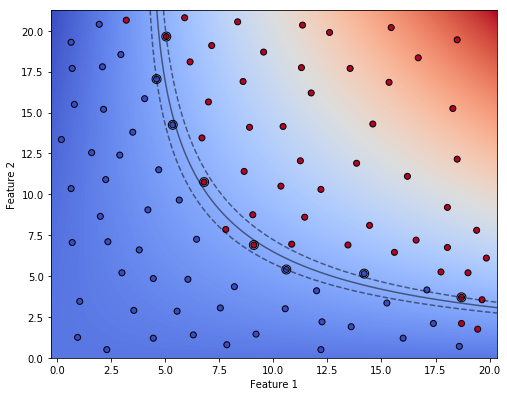

In [13]:
plot(model, X, y, show_vectors=True)

In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Repeat the same for various settings of the degree, and observe the decision boundary.

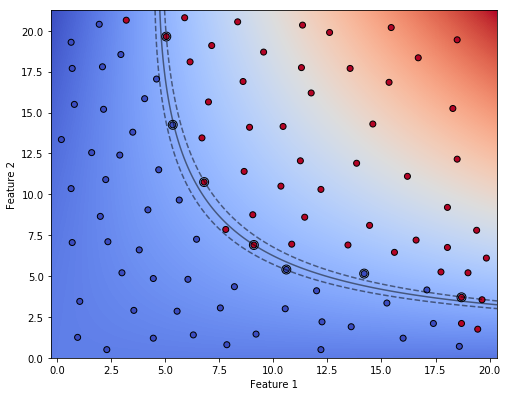

In [15]:
model = SVC(kernel = 'poly', degree=2, C=100)
model.fit(X_train,y_train)
plot(model, X, y, show_vectors=True)

### RBF Kernel

When tuning the RBF kernel, the parameter $\gamma$ affects the radius of influence of each training point that has been chosen as a support vector. With lower gamma, the radius of influence of each support vector increases. One has to tune both $C$ and $\gamma$, however, we will fix $C$ for this example so that we can better understand the effect of $\gamma$.

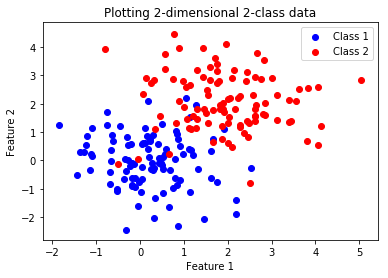

In [16]:
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    x = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
    plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    return x,y

class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [2, 2]
class2Cov = [[1, 0], [0,1]]

X,y = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

To classify the above data, use the RBF kernel with $\gamma$=0.1. Let C be 0.1 for this example.

In [17]:
model = SVC(kernel='rbf', gamma=0.1,C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)


0.95

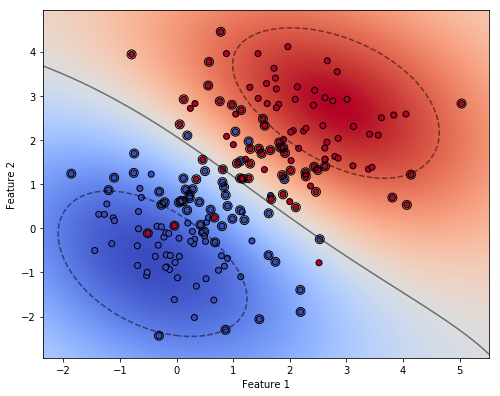

In [18]:
plot(model, X, y, show_vectors=True)

In [19]:
params=model.get_params()
assert(params['C']==0.1)
assert(params['gamma']==0.1)

In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Repeat the same for $\gamma$=1

In [21]:
model = SVC(kernel='rbf', gamma=1,C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)



0.95

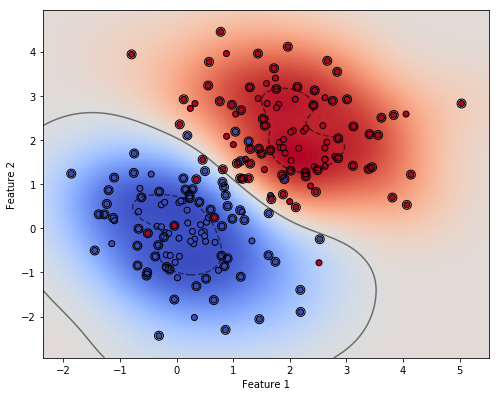

In [22]:
plot(model, X, y, show_vectors=True)

In [23]:
params=model.get_params()
assert(params['C']==0.1)
assert(params['gamma']==1)

In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now repeat the same for $\gamma$=10

In [25]:
model = SVC(kernel='rbf', gamma=10,C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)



0.4

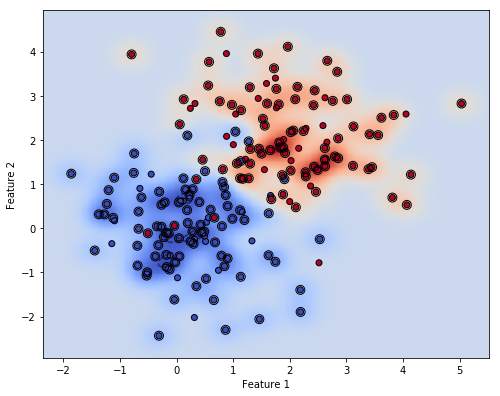

In [26]:
plot(model, X, y, show_vectors=True)

In [27]:
params=model.get_params()
assert(params['C']==0.1)
assert(params['gamma']==10)

In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


With increase in $\gamma$, the curvature of the boundary increases, but it can also lead to overfitting and poorer generalization.

# Perceptrons

Let's look at the perceptron algorithm, a simple classifier that is nonetheless important to study - particularly as an introduction to neural networks.

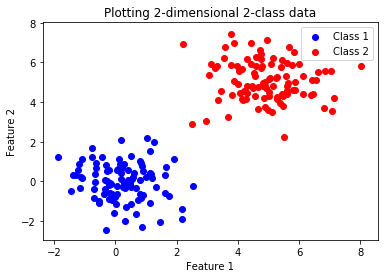

In [29]:
X,y = generate_2d_data([0, 0], class1Cov, [5, 5], class2Cov)

# Labels are -1 and 1 for this classifier!
y[y==0] = -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

We will work with the above data, which is linearly seperable. For notational simplicity, the same `add_intercept` function has been included again.

In [30]:
# Adding a column of ones to get intercept coefficient beta_0 
def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

To train the perceptron, we will implement the following algorithm. Refer to the lectures and slides for further explanation.

- Initialize $\beta$ randomly
- For each iteration of training
    - For each training point $(x_i,y_i)$
        - Obtain prediction $\hat{y_i} = 
                \begin{cases}
                1 \text{ if } x_i^T\beta \ge 0 \\
                -1 \text{ if } x_i^T\beta < 0
                \end{cases}$
        - If $x_i$ is misclassified ($\hat{y_i} \ne y_i $), update $\beta \leftarrow \beta + \rho*x_i*y_i$ 
        
$\rho$ is the learning rate, typically set to $1$ for perceptrons. We will use $\rho=1$ and run the algorithm for 1000 iterations. To initialize $\beta$, use a normal distribution with zero mean and standard deviation of 0.01.

Implement this below.

In [31]:
import scipy.stats
def train_perceptron(X,y,lr=1):
    X = add_intercept(X)
    beta = np.random.normal(0, 0.01, len(X[0]))
    for key,xVar in enumerate(X):
        if np.transpose(xVar).dot(beta)>= 0 : 
            y_pred = 1
        else:
            y_pred = -1
        if y_pred != y[key] :
            beta = beta + lr*xVar*y[key]
    return beta

Now, we need to obtain predictions for our test datapoints. For a given input point $x_i$, we have

$ y_i = 
\begin{cases}
1 \text{ if } x_i^T\beta \ge 0 \\
-1 \text{ if } x_i^T\beta < 0
\end{cases}$

In [32]:
def predict_perceptron(X,beta):
    X = add_intercept(X)
    y = np.zeros(len(X))
    for key,xVar in enumerate(X):
        if np.transpose(xVar).dot(beta)>= 0 : 
            y[key]  = 1
        else:
            y[key] = -1
    return y

Observe the results of the algorithm below.

1.0


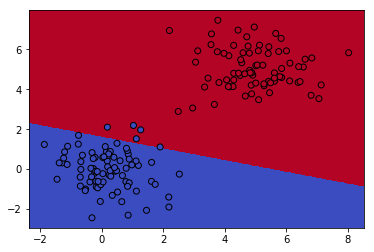

In [33]:
def plot_perceptron(X,y,beta):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    P = predict_perceptron(temp,beta).reshape(yy.shape)
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

beta = train_perceptron(X_train,y_train)
y_pred = predict_perceptron(X_test,beta)
print(metrics.accuracy_score(y_pred,y_test))
plot_perceptron(X_train,y_train,beta)

In [34]:
print(metrics.accuracy_score(y_test,y_test))

1.0


In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now let's work with a dataset that isn't linearly seperable.

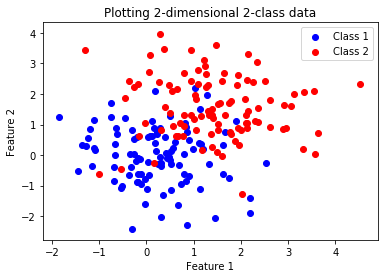

In [39]:
X,y = generate_2d_data([0, 0], class1Cov, [1.5, 1.5], class2Cov)
# Labels are -1 and 1 for this classifier!
y[y==0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

 Try using the perceptron algorithm to classify this dataset.

0.925


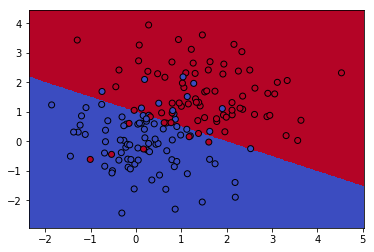

In [40]:
beta = train_perceptron(X_train,y_train)
y_pred = predict_perceptron(X_test,beta)
print(metrics.accuracy_score(y_pred,y_test))
plot_perceptron(X_train,y_train,beta)


Run this classifier a few times. Do you get the same results every time? Recall that in the lecture, it was noted that non-seperable data can lead to cycles and mess up the convergence of the algorithm.

# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

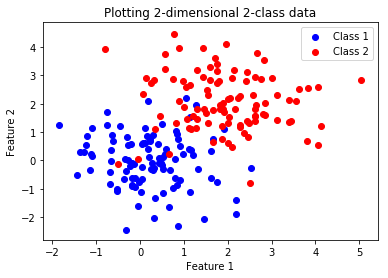

In [35]:
X,y = generate_2d_data([0, 0], class1Cov, [2, 2], class2Cov)
# Labels are -1 and 1 for this classifier!
y[y==0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [58]:
from sklearn.tree import DecisionTreeClassifier
import math
def train_AdaBoost(X,y,k):
    N=5
    w = [1/N]*N
    classifiers = [DecisionTreeClassifier(max_depth=1)]*k
    alphas = [0]*k
    errorMi = [0]*k
    for i in range(k):
        orderWeights = sorted(range(len(w)), key=lambda i: w[i])[-N:]
        Dx = []
        Dy = []
        for j in orderWeights:
            Dx.append(X[j])
            Dy.append(y[j])
        fit = classifiers[i].fit(X,y)
        pred = fit.predict(Dx)
        for j in orderWeights:
            errorMi[i] = errorMi[i]+ w[j]*((Dy[j]!=pred[j]).astype(int))
        alphas[i] = 0.5*math.log((1-errorMi[i])/errorMi[i])
        pred = fit.predict(Dx)
        for j in orderWeights:
            w[j] = w[j]*np.exp(-1*alphas[i]*y[j]*pred[j])
        w = w / sum(w)
    return classifiers, alphas

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [ ]:
def predict_AdaBoost(X,classifiers,alphas):
    yTemp = [0]*len(X)
    y_pred = []
    for key,clf in enumerate(classifiers):
        pred = clf.predict(X)
        for eleNum,element in enumerate(X):
            yTemp[eleNum]= yTemp[eleNum]+(alphas[key]*pred[eleNum])
    for i in yTemp:
        y_pred.append(abs(i)/i)
    y_pred = np.array(y_pred)
    return y_pred

In [60]:
def plot_AdaBoost(X,y,classifiers,alphas):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    P = predict_AdaBoost(temp,classifiers,alphas).reshape(yy.shape)
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Let's look at the predictions of our classifier. Train the model with 25 decision stumps.

In [61]:
classifiers, alphas = train_AdaBoost(X_train,y_train,25)
y_pred = predict_AdaBoost(X_test,classifiers,alphas)

You can observe the results below.

In [62]:
acc = metrics.accuracy_score(y_pred,y_test)
print(acc)
plot_AdaBoost(X,y,classifiers,alphas)

0.1


AttributeError: 'list' object has no attribute 'reshape'

For a sanity check, increase the number of decision stumps and see if the classifier overfits the training data.

In [225]:
classifiers, alphas = train_AdaBoost(X_train,y_train,2)
y_pred = predict_AdaBoost(X_test,classifiers,alphas)
acc = metrics.accuracy_score(y_pred,y_test)
print(acc)

0.1


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
